# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Implementing the Perceptron learning algorithm

* **(25 points)** Define a class named "Perceptron" that implements the **Perceptron** learning algorithm for binary classification, as outlined in the lecture notes. This class should resemble and behave like any SciKit-Learn estimator model, meaning it should inherit from the `sklearn.base.BaseEstimator` class. Additionally, all hyperparameters, such as the learning rate and the number of epochs, should be passed to the class constructor. The class should also include a `fit` function that takes the training data and returns `self`; this is where the perceptron algorithm is implemented. Furthermore, it should define a `predict` function that takes input data and returns their predictions.

In [2]:
from sklearn.base import BaseEstimator

class Perceptron(BaseEstimator):
    def __init__(self, learning_rate=0.1, n_epochs=100):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.weights = None
        self.bias = None

     #Train the model on the data    
    def fit(self, X, y): 
        n_samples, n_features = X.shape
        #set weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        #Cycle through all ephochs, compare y_pred if y_pred is wrong update weights and bias.
        
        for _ in range(self.n_epochs):
            for i in range(n_samples):
                #make single data point predictions
                y_pred = np.sign(np.dot(X[i], self.weights) + self.bias)

                #Update weights and bias if prediction is incorrect
                if y_pred != y[i]:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

        return self
        
        

    def predict(self, X):
        
        predictions = np.sign(np.dot(X, self.weights) + self.bias)
        
        return predictions


    
    def plot_data_and_decision_boundary(self, X, y, title):
        perceptron = self
        # Create a mesh grid for plotting the decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
        # Predict the labels for each point on the mesh grid
        Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    
        
        plt.rcParams['pcolor.shading'] ='nearest'
        plt.pcolormesh(xx, yy, Z, cmap="coolwarm")
        
        # Scatter plot the data points
        plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
    
        plt.title(title)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()



* **(15 points)** Show, through plotting, that your perceptron is capable of correctly classifying the outputs of the AND and OR logical functions below. Plot the data points corresponding to these functions and color them according to their output values. Additionally, visualize the decision boundaries learned by the perceptrons trained on these functions.

```
  .....AND.....
   x1   x2   y
   -1   -1  -1
   -1    1  -1
    1   -1  -1
    1    1   1
   
  .....OR .....
   x1   x2   y
   -1   -1  -1
   -1    1   1
    1   -1   1
    1    1   1
```

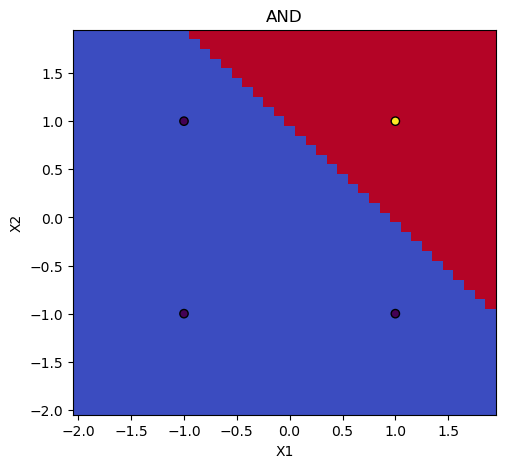

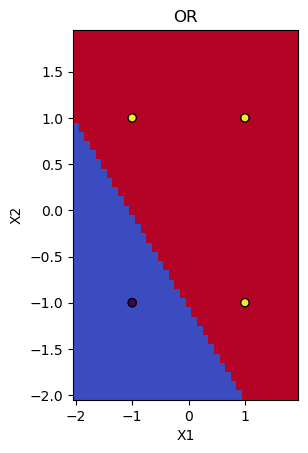

In [3]:
# Array values
X1 = np.array([-1, -1, 1, 1])
X2 = np.array([-1, 1, -1, 1])

X_and = np.column_stack((X1, X2))
X_or = np.column_stack((X1, X2))


y_and = np.array([-1, -1, -1, 1])
y_or = np.array([-1, 1, 1, 1])

and_p = Perceptron(n_epochs=100)
or_p = Perceptron(n_epochs=100)


and_p.fit(X_and, y_and)
or_p.fit(X_or, y_or)


plt.figure(figsize=(12, 5))

# Plot for the AND perceptron
plt.subplot(1, 2, 1)
and_p.plot_data_and_decision_boundary(X_and, y_and,'AND')

# Plot for the OR perceptron
plt.subplot(1, 2, 2)
or_p.plot_data_and_decision_boundary(X_or, y_or,'OR')


plt.show()



## Multi-class logistic regression using One vs. Rest (OvR)
Some models are inherently binary classifiers. For instance, logistic regression is a binary classifier, but we can generalize it to handle multi-class classification problems using the One vs. Rest (OvR), also known as One vs. All, method. The OvR algorithm operates as follows:

If you have a dataset with C classes, you create C binary-classifier models, one for each class. The model for a class $c_i$ is trained using a modified dataset where the output for examples belonging to that class is set to 1, while the output for the rest of the examples is set to 0. When presented with an unseen example, you pass it to all these C models for prediction, and each model returns a positive probability. The final predicted class for the unseen example is determined by the model that returns the highest positive probability value.

* **(25 points)** Define a class named `OneVRest` that implements the One vs. Rest algorithm for the` LogisticRegression` model in SciKit Learn. This class should mimic a typical SciKit Learn estimator by inheriting from `sklearn.base.BaseEstimator` and should include `fit` and `predict` functions.

    **NOTE**: You can utilize the `predict_proba` method of the logistic regression model to obtain the probabilities. This method returns two probabilities for each example: one for the negative class (class 0) and one for the positive class (class 1).

In [4]:
from sklearn.linear_model import LogisticRegression

class OneVsRest(BaseEstimator):
    def __init__(self,base_estimator,n_classes):
        self.base_estimator = base_estimator
        self.n_classes = n_classes
        self.classifiers = [None] * n_classes
   
    def fit(self, X, y):
        for i in range(self.n_classes):
            is_correct_class = (y == i).astype(int)
            classifier= self.base_estimator
            classifier.fit(X,is_correct_class)
            self.classifiers[i]=classifier
        
    def predict(self, X):
        predictions = np.zeros((X.shape[0], self.n_classes))

        for i in range(n_classes):
            probabilities = self.classifiers[i].predict_proba(X)
            predictions[:, i] = probabilities[:, 1]
        best_classes = np.argmax(predictions, axis=1)
        
        return best_classes
        



* **(10 points)** Using the data below, test your `OneVRest` class and plot its training decision regions. Use the `plot_decision_regions` from `mylib` for that.

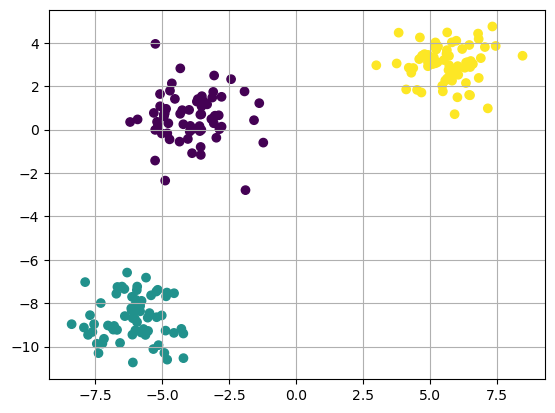

In [5]:
from sklearn.datasets import make_blobs


X, y = make_blobs(200, centers=3, n_features=2, random_state=17)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

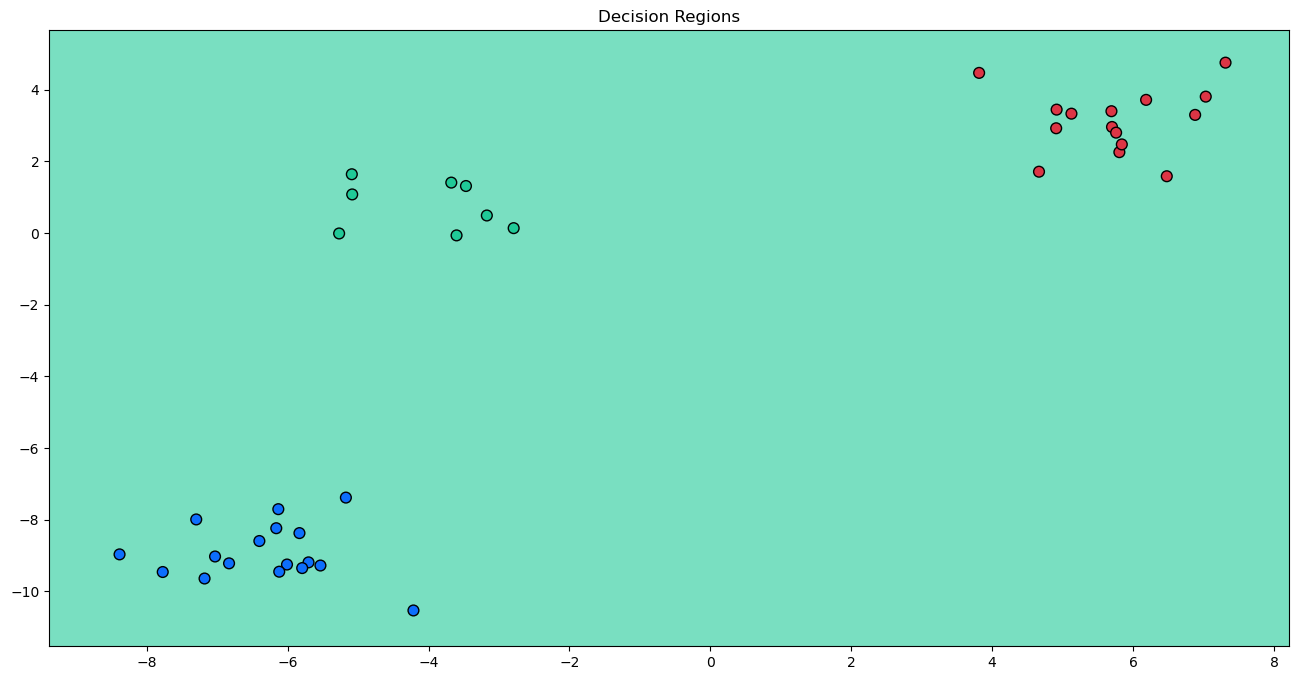

In [6]:
from sklearn.model_selection import train_test_split
import mylib as my

n_classes = 3

#onv created using LogisitcRegresion as Base Estimator
one_vs_rest = OneVsRest(LogisticRegression(), n_classes=n_classes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# Fit the onv classifier
one_vs_rest.fit(X_train, y_train)

# Plot decision regions function from mylib
my.plot_decision_regions(X_test, y_test, one_vs_rest, title="Decision Regions")
plt.show()

## Fitting an MLP to the hepatitis data

In this part you will fit an MLP model to the [Hepatitis](https://archive.ics.uci.edu/dataset/46/hepatitis) dataset. This dataset is small and unbalanced. It consists of 19 input categorical and numerical features, some of which contain missing values. 

The dateset contains the following columns:

```
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80              (Numerical)
     3. SEX: male, female                                (Categorical)
     4. STEROID: no, yes                                 (Categorical)
     5. ANTIVIRALS: no, yes                              (Categorical)
     6. FATIGUE: no, yes                                 (Categorical)
     7. MALAISE: no, yes                                 (Categorical)
     8. ANOREXIA: no, yes                                (Categorical)
     9. LIVER BIG: no, yes                               (Categorical)
    10. LIVER FIRM: no, yes                              (Categorical)
    11. SPLEEN PALPABLE: no, yes                         (Categorical)
    12. SPIDERS: no, yes                                 (Categorical)
    13. ASCITES: no, yes                                 (Categorical)
    14. VARICES: no, yes                                 (Categorical)
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00    (Numerical)
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250        (Numerical)
    17. SGOT: 13, 100, 200, 300, 400, 500,               (Numerical)
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0            (Numerical)
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90      (Numerical)
    20. HISTOLOGY: no, yes                               (Categorical)
```
with the first column being the output: 1 for DIE and 2 for LIVE. All input features have been converted to numeric values. And missing values are marked with a question mark `?`.

* **(5 points)** Load the data into a dataframe and print it. You can use the `my.download_zip_and_open_a_file` function to download the zip file and read a specific file from it. Name the columns of the dataframe using the above list of features. Missing values should show up as 'NaN` in the dataframe. Move the `Class` column to the end and re-code its values such that 0 is used for LIVE and 1 is used for DIE. Show the new dataframe.

    **IMPORTANT NOTE**: To access the functions from the **for-this-class-only** `mylib` package, clone or download it from **[this GitHub page](https://github.com/aalgahmi/mylib)**. You can find instructions on how to clone this package on its main GitHub page, as well as in the `04.working_with_datasets.ipynb` notebook handout. Make sure to place the `mylib` folder from this package in the same directory as this notebook. Once you've completed this step, the following import should work seamlessly.

In [7]:
import mylib as my

file_url = "https://archive.ics.uci.edu/static/public/46/hepatitis.zip"
file_name = 'hepatitis.data'
d = my.download_zip_and_open_a_file(file_url,file_name)

file_contents = d.read().decode("utf-8")

lines = file_contents.splitlines()
lines
# Create a DataFrame from the lines of data
column_names = ["Class","AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE","ANOREXIA","LIVER BIG",
                "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", 
                "SGOT", "ALBUMIN", "PROTIME","HISTOLOGY"] 


df = pd.DataFrame([line.split(',') for line in lines], columns=column_names)

df = df.replace('?', np.nan)

df

#make a copy so orignal data is not accidentally manipulated
df_copy = df.copy()

#moves'Class' column to the end
df_copy = df[[col for col in df.columns if col != 'Class'] + ['Class']]

#re-coded valuese for column 'Class'
df_copy['Class'] = df['Class'].apply(lambda x: '0' if x == '1' else '1')

df_copy

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1,1
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1,1
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1,1
3,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1,1
4,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2,0
151,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2,1
152,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2,1
153,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2,1


* **(20 points)** Create a custom transformer class named `CustomImputer`. This class should inherit from `sklearn.base.BaseEstimator` and `sklearn.base.TransformerMixin`, and it should define two functions:

    * `fit`, which must return `self`. This function should iterate over the columns of its X parameter and populate two instance lists: `self.cat_features_` for categorical features and `self.num_features_` for numerical values. Consider a feature as categorical if the number of its possible values is <= 3.
    
    * `transform`, which should return the transformed data. It should utilize `sklearn.impute.SimpleImputer` with a 'most frequent' strategy to handle missing values in the categorical columns and another `sklearn.impute.SimpleImputer` with a 'mean' strategy to handle missing values in the numerical columns.


In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import numpy as np

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.cat_features_ = []
        self.num_features_ = []

    def fit(self, X, y=None):
        # Split X into Categorical and Numerical (Class is categorical because values <= 3)
        for i in range(X.shape[1]):
            unique_values = np.unique(X[:, i].astype(str))
            if len(unique_values) <= 3:
                self.cat_features_.append(i)
            else:
                self.num_features_.append(i)

        return self

    def transform(self, X):
        cat_data = X[:, self.cat_features_]
        num_data = X[:, self.num_features_]

        # Transform categorical data using a most frequent strategy
        cat_mf_imputer = SimpleImputer(strategy='most_frequent')
        cat_data_imputed = cat_mf_imputer.fit_transform(cat_data)

        # Transform numerical data using a mean strategy
        num_mean_imputer = SimpleImputer(strategy='mean')
        num_data_imputed = num_mean_imputer.fit_transform(num_data)


        X_transformed = X.copy()
        X_transformed[:, self.cat_features_] = cat_data_imputed
        X_transformed[:, self.num_features_] = num_data_imputed

        return X_transformed
            

* **(5 points)** Convert the dataframe into numpy arrays and split them into training and testing sets. Show the shapes of split arrays.

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df_copy.values[:, :-1]
y = df_copy.values[:,-1:]

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=57)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((124, 19), (31, 19), (124, 1), (31, 1))

* **(5 points)** Create a pipeline with two transformers (`CustomImputer` and `MinMaxScaler`) and an estimator (MLPClassifier). The `CustomImputer` handles missing values in the data and passes it to `MinMaxScaler` to normalize the values before training the `MLPClassifier` model. Use a `ReLU` activation function for the MLP model and enable early stopping with `n_iter_no_change` set to 5.

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(
    CustomImputer(),  
    MinMaxScaler(),  
    MLPClassifier(
        activation='relu', 
        early_stopping=True,
        n_iter_no_change=5  
    )
)


pipeline.fit(X_train, y_train.ravel()) 
y_pred = pipeline.predict(X_test)

* **(5 points)** Test the trained MLP model on the testing dataset and print its accuracy, recall, precision, and F1 score. Use the appropriate functions from `sklearn.metrics` to calculate these values.

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, pos_label='1')
precision = precision_score(y_test, y_pred, pos_label='1')
f1 = f1_score(y_test, y_pred, pos_label='1')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.7419354838709677
Recall: 0.8
Precision: 0.8695652173913043
F1 Score: 0.8333333333333333


* **(5 points)** In a figure with three subplots in a row, display the testing confusion matrix, ROC curve, and precision-recall curve.

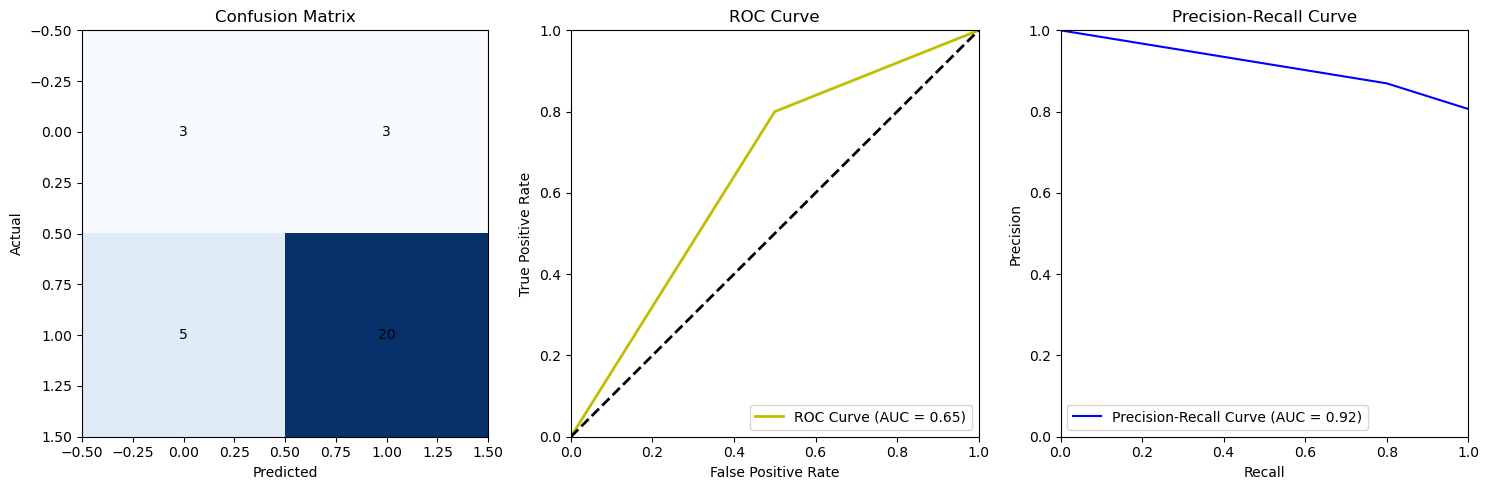

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

y_test = y_test.astype(int) 
y_pred = y_pred.astype(int)


conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the Confusion Matrix

axs[0].imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)  # Specify a color map
axs[0].set_title('Confusion Matrix')

# Add text annotations for the cell values
for i in range(conf_matrix.shape[0]):
    
    for j in range(conf_matrix.shape[1]):
        axs[0].text(j, i, str(conf_matrix[i, j]), ha="center", va="center")
        
axs[0].set_xlabel('Predicted')
axs[0].set_ylabel('Actual')


# Plot the ROC Curve

axs[1].plot(fpr, tpr, color='y', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
axs[1].plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')

axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.0])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve')
axs[1].legend(loc='lower right')

# Plot the Precision-Recall Curve

axs[2].plot(recall, precision, color='b', label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

axs[2].set_xlim([0.0, 1.0])
axs[2].set_ylim([0.0, 1.0])
axs[2].set_xlabel('Recall')
axs[2].set_ylabel('Precision')
axs[2].set_title('Precision-Recall Curve')
axs[2].legend(loc='lower left')

plt.tight_layout()
plt.show()